In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    """
    Implementación de un perceptrón simple.

    Atributos:
        weights (ndarray): Pesos del perceptrón, incluyendo el bias.
        lr (float): Tasa de aprendizaje.
        epochs (int): Número de iteraciones para el entrenamiento.
    """
    
    def __init__(self, num_inputs: int, lr: float, epochs: int, pesos=None):
        """
        Inicializa el perceptrón.

        Args:
            num_inputs (int): Número de entradas.
            lr (float): Tasa de aprendizaje.
            epochs (int): Número de iteraciones para el entrenamiento.
            pesos (ndarray, optional): Pesos iniciales del perceptrón. 
                Si se proporciona, se utilizarán estos pesos.
        """
        if pesos is not None:
            self.weights = pesos  # Cargar pesos predefinidos
        else:
            self.weights = np.random.rand(num_inputs + 1)  # Peso extra para el bias
            
        self.lr = lr  # Tasa de aprendizaje
        self.epochs = epochs  # Número de iteraciones

    def act_fn(self, x: np.ndarray, funcion: str = 'step') -> np.ndarray:
        """Calcula la función de activación."""
        if funcion == 'step':    
            return np.where(x > 0, 1, 0)
        elif funcion == 'sigmoid':
            return 1 / (1 + np.exp(-x)) 
        elif funcion == 'relu':
            return np.where(x > 0, x, 0)
        elif funcion == 'tanh':
            return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
        else:
            raise ValueError("Función de activación no soportada.")

    def predict(self, inputs: np.ndarray) -> int:
        """Realiza una predicción basada en las entradas."""
        return self.act_fn(np.dot(inputs, self.weights[1:]) + self.weights[0])

    def compute_cost(self, in_train: np.ndarray, clases: np.ndarray) -> float:
        """Calcula el costo total (error cuadrático medio)."""
        predicciones = self.predict(in_train)
        error = clases - predicciones
        return np.mean(error ** 2)

    def train(self, in_train: np.ndarray, clases: np.ndarray, verbose: bool = False):
        """Entrena el perceptrón con las entradas y las clases."""
        errores = []
        for _ in range(self.epochs):
            e = 0
            for entrada, clase in zip(in_train, clases):
                prediccion = self.predict(entrada)
                error = clase - prediccion
                self.weights[0] += self.lr * error
                self.weights[1:] += self.lr * error * entrada
                
                e += np.abs(error)
            errores.append(e)
            
            # Calcular y almacenar el costo al final de cada época
            costo = self.compute_cost(in_train, clases)
            print(f"Época {_ + 1}: Costo = {costo}")

        if verbose:
            plt.figure()
            plt.plot(errores)
            plt.title('Errores durante el entrenamiento')
            plt.xlabel('Epochs')
            plt.ylabel('Error')
            plt.show()

    def get_weights(self) -> np.ndarray:
        """Recupera los pesos del perceptrón."""
        return self.weights

    def plot_decision_boundary(self, in_train: np.ndarray, clases: np.ndarray):
        """Plotea las entradas y la frontera de decisión del perceptrón."""
        # Definir el rango para el gráfico
        x_min, x_max = in_train[:, 0].min() - 1, in_train[:, 0].max() + 1
        y_min, y_max = in_train[:, 1].min() - 1, in_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                             np.linspace(y_min, y_max, 100))

        # Realizar predicciones para cada punto del meshgrid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Crear el gráfico
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        plt.scatter(in_train[:, 0], in_train[:, 1], c=clases, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
        plt.xlabel('Entrada 1')
        plt.ylabel('Entrada 2')
        plt.title('Frontera de decisión del Perceptrón')
        plt.show()


La **tercera tarea** que le asignaremos al perceptrón es que aprenda a comportarse como una compuerta lógica XOR. Esto implica que el perceptrón deberá ser capaz de producir una salida de 1 únicamente cuando una de las entradas sea 1, pero no ambas; en todos los demás casos, la salida deberá ser 0. Puesto en términos de la tabla de verdad:

| $x_1$  | $x_2$  |   $y$|
| ------ |:------:| -:|
| 0      | 0      | 0 |
| 0      | 1      | 1 |
| 1      | 0      | 1 |
| 1      | 1      | 0 |

Implementamos matriz de entradas *x* y vector de salidas *y*. Además, instanciamos clase perceptron en un objeto llamado "ia_xor".


In [3]:
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])
ia_xor = Perceptron(num_inputs=2, lr=0.2, epochs=10)
print(x, y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]] [0 1 1 0]


Nos ahorramos la inspección inicial de las funciones de activación pues son las mismas que antes. Sí visualicemos los pesos iniciales (aleatorios) y hagamos una predicción sin entrenamiento para constatar mala respuesta.

In [4]:
print("Pesos: ", ia_xor.get_weights())
print("Predicciones sin entrenamiento:")
for entradas, label in zip(x, y):
  prediccion = ia_xor.predict(entradas)
  print('Entradas:', entradas, ' Correcto:', label, ' Predicción:', prediccion)

Pesos:  [0.70103884 0.76140688 0.32582642]
Predicciones sin entrenamiento:
Entradas: [0 0]  Correcto: 0  Predicción: 1
Entradas: [0 1]  Correcto: 1  Predicción: 1
Entradas: [1 0]  Correcto: 1  Predicción: 1
Entradas: [1 1]  Correcto: 0  Predicción: 1


Entrenemos la neurona (con *verbose*) y volvemos a correr predicción:

Época 1: Costo = 0.5
Época 2: Costo = 0.5
Época 3: Costo = 0.25
Época 4: Costo = 0.5
Época 5: Costo = 0.5
Época 6: Costo = 0.5
Época 7: Costo = 0.5
Época 8: Costo = 0.5
Época 9: Costo = 0.5
Época 10: Costo = 0.5


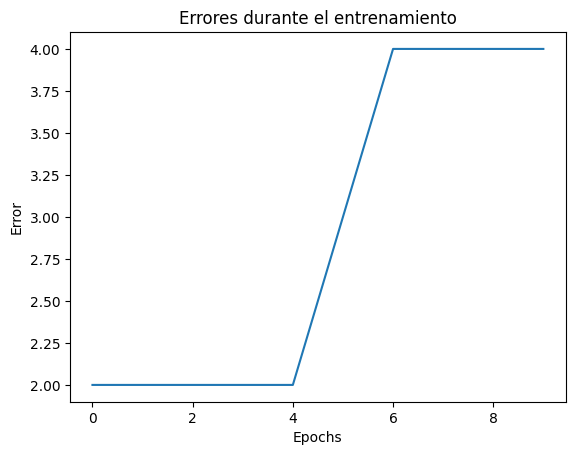

Entradas: [0 0]  Correcto: 0  Predicción: 1
Entradas: [0 1]  Correcto: 1  Predicción: 1
Entradas: [1 0]  Correcto: 1  Predicción: 0
Entradas: [1 1]  Correcto: 0  Predicción: 0


In [5]:
ia_xor.train(x, y, True)
for entradas, label in zip(x, y):
  prediccion = ia_xor.predict(entradas)
  print('Entradas:', entradas, ' Correcto:', label, ' Predicción:', prediccion)

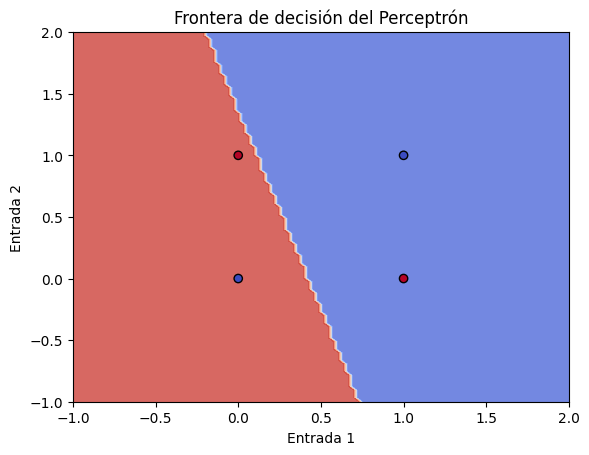

In [6]:
ia_xor.plot_decision_boundary(x,y)

Se puede ver la divergencia de la función de costo. Además, se nota que las predicciones siguen siendo incorrectas. ¿Será cuestión de épocas o  tasa? Repitamos dos ejemplos, cambiando época y tasa de aprendizaje.

Época 1: Costo = 0.5
Época 2: Costo = 0.25
Época 3: Costo = 0.25
Época 4: Costo = 0.5
Época 5: Costo = 0.5
Época 6: Costo = 0.5
Época 7: Costo = 0.5
Época 8: Costo = 0.5
Época 9: Costo = 0.5
Época 10: Costo = 0.5


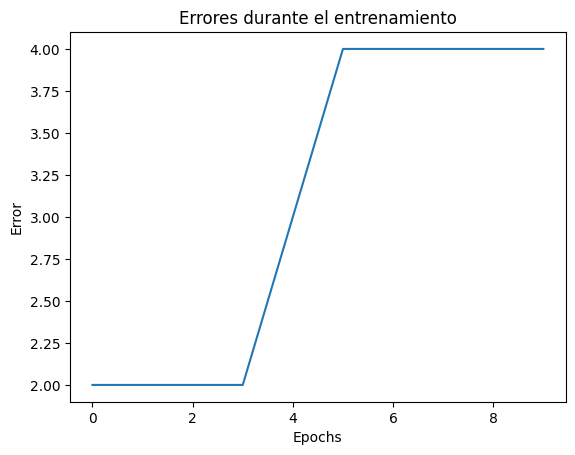

Entradas: [0 0]  Correcto: 0  Predicción: 1
Entradas: [0 1]  Correcto: 1  Predicción: 1
Entradas: [1 0]  Correcto: 1  Predicción: 0
Entradas: [1 1]  Correcto: 0  Predicción: 0


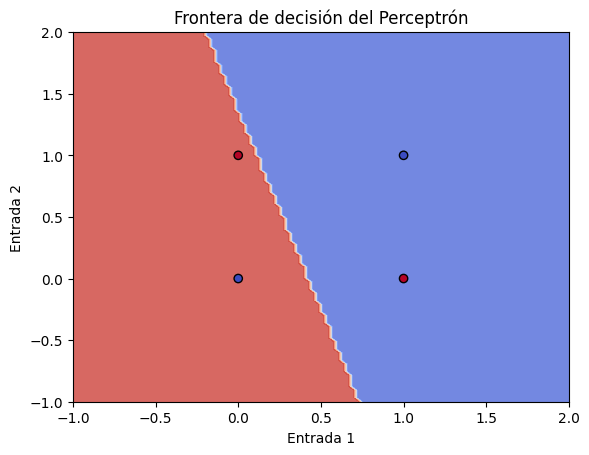

In [7]:
# lr = 0.2, epoch= 100
ia_xor_2 = Perceptron(num_inputs=2, lr=0.2, epochs=10)
ia_xor_2.train(x, y, True)
for entradas, label in zip(x, y):
  prediccion = ia_xor_2.predict(entradas)
  print('Entradas:', entradas, ' Correcto:', label, ' Predicción:', prediccion)

ia_xor.plot_decision_boundary(x,y)

## Resolución XOR

Se propone una solución usando Clasificador MPL (Multi Layer Perceptron) implementado en sklearn.

Primero defino una función para hacer el mismo ploteado de antes *plot_decision_boundary* y después implento código.

In [8]:
def plot_decision_boundary(model, X, y):
    """Dibuja la frontera de decisión del modelo en un gráfico.

    Esta función crea un gráfico de dispersión que muestra la frontera de decisión
    de un clasificador, así como las muestras de entrenamiento.

    Args:
        model: Un modelo de clasificador (por ejemplo, MLPClassifier) que debe tener un
            método `predict`.
        X (ndarray): Un arreglo de forma (n_samples, 2) que contiene las coordenadas
            de las muestras de entrada.
        y (ndarray): Un arreglo de forma (n_samples,) que contiene las etiquetas
            correspondientes a las muestras de entrada.

    Returns:
        None: Esta función no devuelve ningún valor. Muestra un gráfico en su lugar.
    """
    # Crear un meshgrid para la gráfica
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predecir la clase para cada punto del meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Crear el gráfico
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Entrada 1')
    plt.ylabel('Entrada 2')
    plt.title('Frontera de decisión de MLPClassifier')
    plt.show()


def print_weights(model):
    """
    Imprime los pesos y biases del modelo MLPClassifier.

    Args:
        model (MLPClassifier): El modelo entrenado de tipo MLPClassifier.

    La función obtiene los pesos de la capa oculta y de la capa de salida
    y los imprime junto con el bias de la capa de salida.
    """
    
    # Obtener los pesos de la capa oculta y de salida
    hidden_weights = model.coefs_[0]  # Pesos de la capa oculta
    output_weights = model.coefs_[1]  # Pesos de la capa de salida

    # Bias para la capa oculta y salida
    bias_hidden = model.intercepts_[0]  # Bias de la capa oculta
    bias_output = model.intercepts_[1]  # Bias de la capa de salida

    # Imprimir pesos y bias de la capa oculta
    print("Pesos de la capa oculta:")
    for i, weight in enumerate(hidden_weights):
        print(f"W{i + 1}: {weight}")
    
    print("Bias de la capa oculta: {}".format(bias_hidden))

    # Imprimir pesos y bias de la capa de salida
    print("\nPesos de la capa de salida:")
    print("W salida: {}".format(output_weights))
    print("Bias de salida: {}".format(bias_output))


Pesos de la capa oculta:
W1: [-6.70151711  7.04317792 -6.52580854 -2.30635781 -4.52182024  5.18549796
 -7.63616272  4.90979733]
W2: [ 2.72014513  7.99202164 -7.35218797 -2.77191257  1.5047668   3.97383145
 -8.54886631 -8.25590767]
Bias de la capa oculta: [ 0.30912368 -2.22952244  2.57145548 -0.83672487  1.12318763 -7.08728779
  2.52305421 -2.11818493]

Pesos de la capa de salida:
W salida: [[-2.81587194  3.67054321]
 [-1.82401629  0.83041045]
 [ 4.05097755 -3.91884466]
 [ 1.38100615 -1.46578542]
 [-1.78745743  2.45744808]
 [ 5.87366171 -5.77436238]
 [ 5.03591239 -5.20843948]
 [-5.05217877  6.21425521]]
Bias de salida: [ 1.004897   -1.83134718]


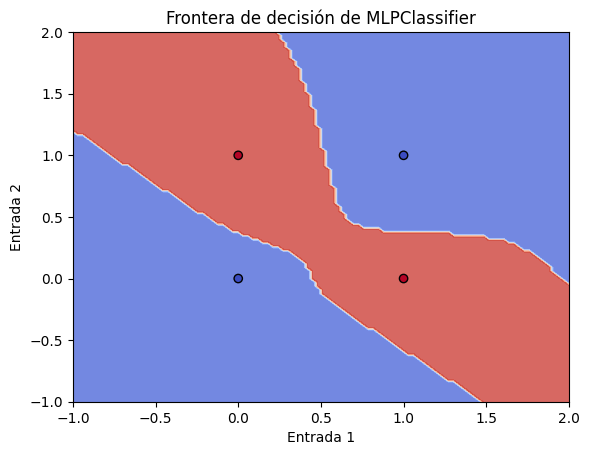

In [9]:
from sklearn.neural_network import MLPClassifier


# Crear y entrenar el modelo
mlp = MLPClassifier(hidden_layer_sizes=(8,2), activation='logistic', max_iter=1000, learning_rate_init=0.2, random_state=42)
mlp.fit(x, y)
print_weights(mlp)
plot_decision_boundary(mlp,x,y)